In [1]:
"""
sanity checking the reconstruction loss dataset
"""

'\nsanity checking the reconstruction loss dataset\n'

In [3]:
import json
import os
import numpy as np

import sys, os
sys.path.append(os.path.abspath(".."))   # one level up from notebook/
print(os.path.abspath(".."))

from data.utils.dataloaders import get_imagenet_dataloader, ReconstructionDataset_Neural


/BS/data_mani_compress/work/thesis/thesis


ModuleNotFoundError: No module named 'data.utils'

In [20]:
# folder containing your JSON files

folder = "/BS/data_mani_compress/work/thesis/thesis/data/datasets/reconstruction_loss_imgnet_train"

# list all files that match the naming pattern
files = [f for f in os.listdir(folder) if f.startswith("reconstruction_errors_") and f.endswith(".json")]

# sort files to ensure correct order
files.sort()
print((files), "files found.")


combined = []

for fname in files:
    fpath = os.path.join(folder, fname)
    with open(fpath, "r") as f:
        data = json.load(f)
        combined.extend(data)  # merge dictionaries

# write combined json
out_path = os.path.join(folder, "reconstruction_errors_all.json")
with open(out_path, "w") as f:
    json.dump(combined, f, indent=2)

print(f"Combined {len(files)} files into {out_path}, total entries = {len(combined)}")

['reconstruction_errors_0000_0070.json', 'reconstruction_errors_0070_0140.json', 'reconstruction_errors_0140_0210.json', 'reconstruction_errors_0210_0280.json', 'reconstruction_errors_0280_0350.json', 'reconstruction_errors_0350_0420.json', 'reconstruction_errors_0420_0490.json', 'reconstruction_errors_0490_0700.json', 'reconstruction_errors_0700_0900.json', 'reconstruction_errors_0900_1100.json', 'reconstruction_errors_10300_10800.json', 'reconstruction_errors_10800_11300.json', 'reconstruction_errors_1100_1400.json', 'reconstruction_errors_1400_1600.json', 'reconstruction_errors_1600_1900.json', 'reconstruction_errors_1900_2200.json', 'reconstruction_errors_2200_2500.json', 'reconstruction_errors_2500_2800.json', 'reconstruction_errors_2800_3200.json', 'reconstruction_errors_3200_3500.json', 'reconstruction_errors_3500_3800.json', 'reconstruction_errors_3800_4300.json', 'reconstruction_errors_4300_4800.json', 'reconstruction_errors_4800_5300.json', 'reconstruction_errors_5300_5800.js

In [4]:
with open("/BS/data_mani_compress/work/thesis/thesis/data/datasets/reconstruction_loss_imgnet_train/reconstruction_errors_all.json", "r") as f:
    combined = json.load(f)

print(f"Total entries in combined file: {len(combined)}")

Total entries in combined file: 3405440


In [5]:
# only get the vgg_error and the mse errors as a np list 
# then compute the log1p 
# then find the mean and stddev
vgg_error = [entry['vgg_error'] for entry in combined]

mean_before_log = float(np.asarray(vgg_error, dtype=np.float64).mean())  # ddof=0 (matches np.std default)
std_before_log = float(np.asarray(vgg_error, dtype=np.float64).std())
print(f"Mean VGG Error before log: {mean_before_log:.4f}, Std VGG Error before log: {std_before_log:.4f}")

vgg_error_log = np.sign(vgg_error) * np.log1p(np.abs(vgg_error))
mean_vgg_error = float(vgg_error_log.mean())  # ddof=0 (matches np.std default)
std_vgg_error = float(vgg_error_log.std())
print(f"Mean VGG Error after (signed log1p): {mean_vgg_error:.4f}, Std VGG Error (signed log1p): {std_vgg_error:.4f}")



mse_error = [entry['mse_error'] for entry in combined]

mean_before_log = float(np.asarray(mse_error, dtype=np.float64).mean())  # ddof=0 (matches np.std default)
std_before_log = float(np.asarray(mse_error, dtype=np.float64).std())
print(f"Mean MSE Error before log: {mean_before_log:.4f}, Std MSE Error before log: {std_before_log:.4f}")

mse_error_log = np.sign(mse_error) * np.log1p(np.abs(mse_error))
mean_mse_error = float(mse_error_log.mean())  # ddof=0 (matches np.std default)
std_mse_error = float(mse_error_log.std())
print(f"Mean MSE Error after (signed log1p): {mean_mse_error:.4f}, Std MSE Error (signed log1p): {std_mse_error:.4f}")

Mean VGG Error before log: 2.8324, Std VGG Error before log: 0.7998
Mean VGG Error after (signed log1p): 1.3205, Std VGG Error (signed log1p): 0.2188
Mean MSE Error before log: 0.2203, Std MSE Error before log: 0.0754
Mean MSE Error after (signed log1p): 0.1973, Std MSE Error (signed log1p): 0.0612


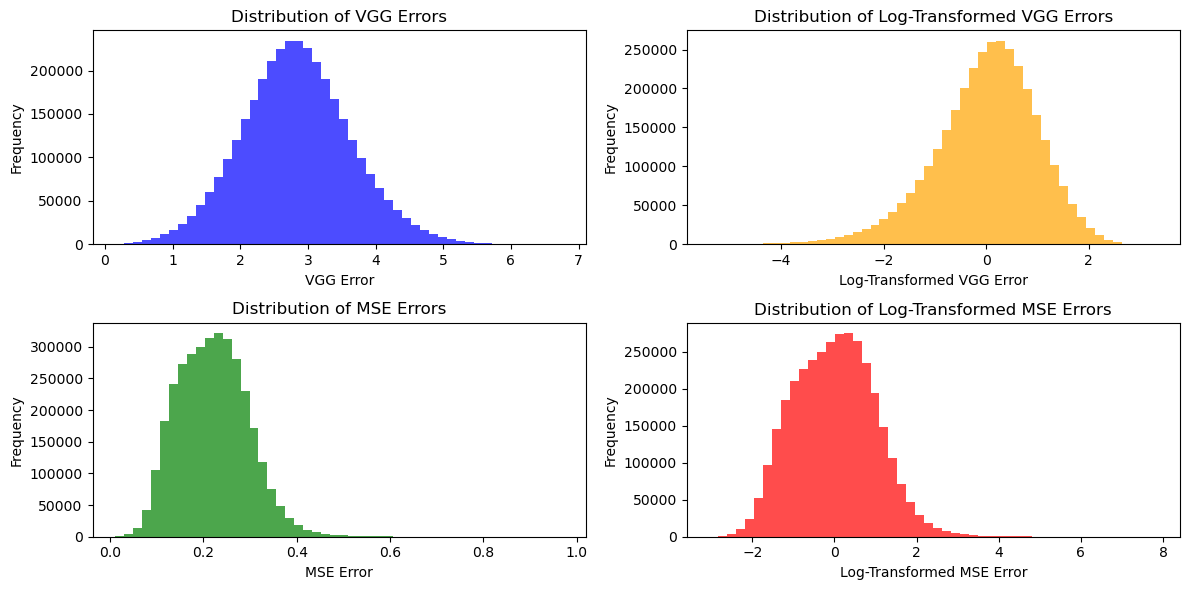

In [7]:
# plot the distribution of vgg and mse errors before and after normalization
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)

plt.hist(vgg_error, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of VGG Errors')
plt.xlabel('VGG Error')
plt.ylabel('Frequency')
plt.subplot(2, 2, 2)

# find the normalized vgg errors
vgg_error_log = np.array(vgg_error_log)
vgg_error_log_normalized = (vgg_error_log - mean_vgg_error) / std_vgg_error
plt.hist(vgg_error_log_normalized, bins=50, color='orange', alpha=0.7)
plt.title('Distribution of Log-Transformed VGG Errors')
plt.xlabel('Log-Transformed VGG Error')
plt.ylabel('Frequency')
plt.subplot(2, 2, 3)


plt.hist(mse_error, bins=50, color='green', alpha=0.7)
plt.title('Distribution of MSE Errors')
plt.xlabel('MSE Error')
plt.ylabel('Frequency')
plt.subplot(2, 2, 4)

# find the normalized mse errors
mse_error_log = np.array(mse_error_log)
mse_error_log_normalized = (mse_error_log - mean_mse_error) / std_mse_error
plt.hist(mse_error_log_normalized, bins=50, color='red', alpha=0.7)
plt.title('Distribution of Log-Transformed MSE Errors')
plt.xlabel('Log-Transformed MSE Error')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [29]:
# get all the vgg errors
vgg_errors = [entry["vgg_error"] for entry in combined]
print(len(vgg_errors), "vgg errors found.")

3405440 vgg errors found.


In [34]:


vgg_errors = np.array(vgg_errors)
print(np.mean(vgg_errors), "mean vgg error")
print(np.min(vgg_errors), "min vgg error")
print(np.max(vgg_errors), "max vgg error")

2.83240806948364 mean vgg error
0.14857468008995056 min vgg error
6.7774505615234375 max vgg error


In [5]:
dataloader = get_imagenet_dataloader(batch_size=4, split="train")

/BS/data_mani_compress/work/miniforge3/envs/dgm_geometry/lib/python3.11/site-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 64 worker processes in total. Our suggested max number of worker in current system is 20, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [6]:

recon_dataset = ReconstructionDataset_Neural(
        reconstruction_data=combined,
        dataloader=dataloader,
        filter_key="vgg_error",
        min_error=2.8304,
        max_error=2.8364,
    )

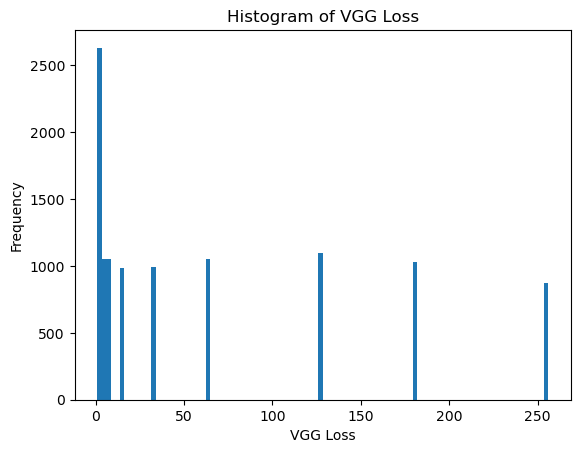

In [7]:
# plot vgg loss 
import matplotlib.pyplot as plt
vgg_errors = [entry["k_value"] for entry in recon_dataset]
plt.hist(vgg_errors, bins=100)
plt.xlabel("VGG Loss")
plt.ylabel("Frequency")
plt.title("Histogram of VGG Loss")
plt.show()

In [11]:
recon_dataset[0]  # first item in the dataset

{'image': tensor([[[-2.0494, -2.1008, -2.1008,  ..., -2.1179, -2.1179, -2.0837],
          [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
          [-2.0837, -2.0323, -2.0494,  ..., -2.0665, -2.0837, -2.0837],
          ...,
          [-0.9363, -1.1247, -1.3473,  ..., -1.1247, -1.0562, -0.9020],
          [-1.4158, -1.3644, -1.4672,  ..., -1.0904, -1.3130, -0.8164],
          [-1.4158, -0.8849, -1.3815,  ..., -0.8678, -0.9534, -0.9877]],
 
         [[-1.9657, -2.0007, -1.9307,  ..., -2.0357, -2.0357, -2.0007],
          [-2.0007, -2.0007, -1.9657,  ..., -2.0007, -2.0007, -2.0007],
          [-2.0007, -1.9482, -1.9307,  ..., -1.9832, -2.0007, -2.0007],
          ...,
          [-0.8803, -1.0203, -1.0553,  ..., -1.0378, -0.8102, -0.7052],
          [-1.3529, -1.2654, -1.1779,  ..., -1.0028, -1.0728, -0.6176],
          [-1.3704, -0.7577, -1.0728,  ..., -0.7577, -0.7052, -0.7927]],
 
         [[-1.6999, -1.7696, -1.7870,  ..., -1.8044, -1.8044, -1.7696],
          [-1.7522,

In [13]:
# order recon_dataset by token count
recon_dataset = sorted(recon_dataset, key=lambda x: x["k_value"])

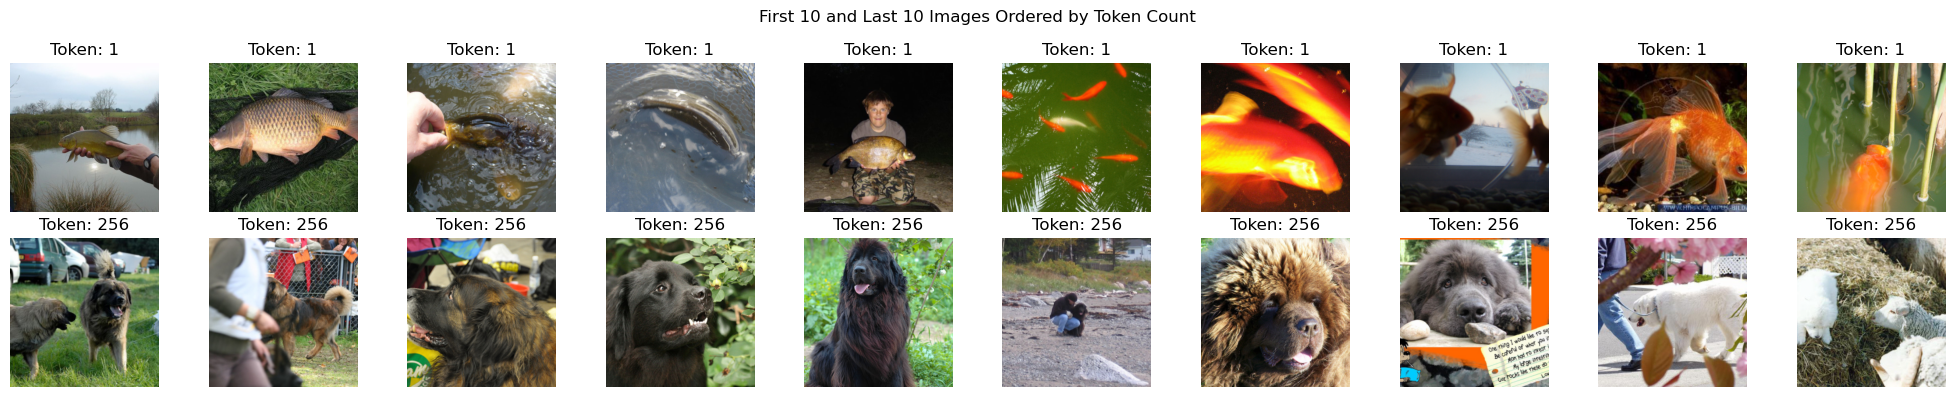

In [17]:
# Show the first 10 and last 10 images with correct colors
# Images coming from get_imagenet_dataloader are ImageNet-normalized (CHW), so we need to:
# 1) Denormalize back to [0,1]
# 2) Permute from CHW -> HWC for matplotlib

import torch
import matplotlib.pyplot as plt

mean = torch.tensor([0.485, 0.456, 0.406]).view(1, 3, 1, 1)
std  = torch.tensor([0.229, 0.224, 0.225]).view(1, 3, 1, 1)

def to_numpy_img(x):
    # x can be a tensor [3,H,W] or numpy [H,W,3] already
    if isinstance(x, torch.Tensor):
        if x.ndim == 4:  # [B,3,H,W] -> take first
            x = x[0]
        # denormalize
        x = x * std.squeeze(0) + mean.squeeze(0)
        # clamp to [0,1]
        x = x.clamp(0, 1)
        # CHW -> HWC
        x = x.permute(1, 2, 0).cpu().numpy()
    return x

first_10_images = [entry["image"] for entry in recon_dataset[:10]]
last_10_images  = [entry["image"] for entry in recon_dataset[-10:]]

fig, axes = plt.subplots(2, 10, figsize=(20, 4))
for i in range(10):
    img_top = to_numpy_img(first_10_images[i])
    axes[0, i].imshow(img_top)
    axes[0, i].axis("off")
    axes[0, i].set_title(f"Token: {recon_dataset[i]['k_value']}")

    img_bot = to_numpy_img(last_10_images[i])
    axes[1, i].imshow(img_bot)
    axes[1, i].axis("off")
    axes[1, i].set_title(f"Token: {recon_dataset[-10 + i]['k_value']}")

plt.suptitle("First 10 and Last 10 Images Ordered by Token Count")
plt.tight_layout()
plt.show()